In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

631

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bc410ec95229b328ec759306d5e17889


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | piopio
Processing Record 5 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | aripuana
Processing Record 10 of Set 1 | vondrozo
Processing Record 11 of Set 1 | burley
Processing Record 12 of Set 1 | rioja
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | coahuayana
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | yenagoa
Processing Record 18 of Set 1 | chernaya kholunitsa
Processing Record 19 of Set 1 | monchegorsk
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Se

Processing Record 39 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 4 | havoysund
Processing Record 41 of Set 4 | bokspits
City not found. Skipping...
Processing Record 42 of Set 4 | itarema
Processing Record 43 of Set 4 | pavlodar
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | tlalmanalco
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | bac can
City not found. Skipping...
Processing Record 49 of Set 4 | tunduru
City not found. Skipping...
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | kusk
City not found. Skipping...
Processing Record 2 of Set 5 | lisala
Processing Record 3 of Set 5 | impfondo
Processing Record 4 of Set 5 | bambanglipuro
Processing Record 5 of Set 5 | dwarka
Processing Record 6 of Set 5 | wattegama
Processing Record 7 of Set 5 | vila do maio
Processing Record 8 of Set 5 | zhanaozen
Processing Record 9 of Set 5 | lompoc
Pr

Processing Record 25 of Set 8 | cherskiy
Processing Record 26 of Set 8 | sao joao da barra
Processing Record 27 of Set 8 | irbeyskoye
Processing Record 28 of Set 8 | newport
Processing Record 29 of Set 8 | sevlievo
Processing Record 30 of Set 8 | luohe
Processing Record 31 of Set 8 | nuevo ideal
Processing Record 32 of Set 8 | kuandian
Processing Record 33 of Set 8 | marsa matruh
Processing Record 34 of Set 8 | araouane
Processing Record 35 of Set 8 | mehamn
Processing Record 36 of Set 8 | aksu
Processing Record 37 of Set 8 | karema
Processing Record 38 of Set 8 | nioro
Processing Record 39 of Set 8 | eston
Processing Record 40 of Set 8 | north augusta
Processing Record 41 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 42 of Set 8 | nouadhibou
Processing Record 43 of Set 8 | san vicente
Processing Record 44 of Set 8 | shu
Processing Record 45 of Set 8 | itainopolis
Processing Record 46 of Set 8 | talaya
Processing Record 47 of Set 8 | ipueiras
Processing Record 48 

Processing Record 13 of Set 12 | athabasca
Processing Record 14 of Set 12 | kisangani
Processing Record 15 of Set 12 | kafue
Processing Record 16 of Set 12 | sambava
Processing Record 17 of Set 12 | havre-saint-pierre
Processing Record 18 of Set 12 | velsk
Processing Record 19 of Set 12 | hohhot
Processing Record 20 of Set 12 | vanino
Processing Record 21 of Set 12 | horta
Processing Record 22 of Set 12 | geraldton
Processing Record 23 of Set 12 | adrar
Processing Record 24 of Set 12 | gobabis
Processing Record 25 of Set 12 | inuvik
Processing Record 26 of Set 12 | wamba
Processing Record 27 of Set 12 | demyanovo
Processing Record 28 of Set 12 | zyryanovsk
Processing Record 29 of Set 12 | beihai
Processing Record 30 of Set 12 | high level
Processing Record 31 of Set 12 | riyadh
Processing Record 32 of Set 12 | tezu
Processing Record 33 of Set 12 | urdoma
Processing Record 34 of Set 12 | jiwani
Processing Record 35 of Set 12 | staryy krym
Processing Record 36 of Set 12 | melfi
Processin

In [10]:
len(city_data)

579

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,37.40,91,75,14.99,AR,2020-12-02 03:44:10
1,Upernavik,72.79,-56.15,13.87,95,100,14.14,GL,2020-12-02 03:46:21
2,Piopio,-38.47,175.02,73.00,53,85,3.00,NZ,2020-12-02 03:46:21
3,Vaini,-21.20,-175.20,80.60,74,75,8.05,TO,2020-12-02 03:46:21
4,Bluff,-46.60,168.33,55.17,75,99,29.97,NZ,2020-12-02 03:46:21
...,...,...,...,...,...,...,...,...,...
574,Vorchdorf,48.00,13.92,28.99,91,79,4.00,AT,2020-12-02 03:47:34
575,Torit,4.41,32.57,73.65,64,100,3.22,SS,2020-12-02 03:47:34
576,Auki,-8.77,160.70,83.84,74,84,1.74,SB,2020-12-02 03:47:34
577,Grand Gaube,-20.01,57.66,80.01,81,4,5.99,MU,2020-12-02 03:47:34


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-12-02 03:44:10,-54.80,-68.30,37.40,91,75,14.99
1,Upernavik,GL,2020-12-02 03:46:21,72.79,-56.15,13.87,95,100,14.14
2,Piopio,NZ,2020-12-02 03:46:21,-38.47,175.02,73.00,53,85,3.00
3,Vaini,TO,2020-12-02 03:46:21,-21.20,-175.20,80.60,74,75,8.05
4,Bluff,NZ,2020-12-02 03:46:21,-46.60,168.33,55.17,75,99,29.97
5,Rikitea,PF,2020-12-02 03:46:21,-23.12,-134.97,75.78,66,79,5.03
6,Aripuana,BR,2020-12-02 03:46:22,-9.17,-60.63,73.99,89,100,0.72
7,Vondrozo,MG,2020-12-02 03:46:22,-22.82,47.28,72.59,78,1,1.70
8,Burley,US,2020-12-02 03:46:22,42.54,-113.79,24.80,79,1,3.36
9,Rioja,AR,2020-12-02 03:46:22,-29.41,-66.85,77.59,58,48,0.40


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

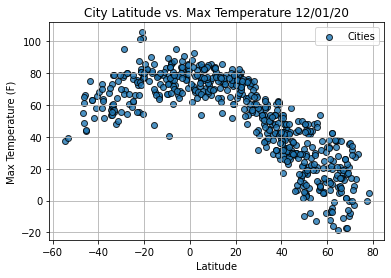

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

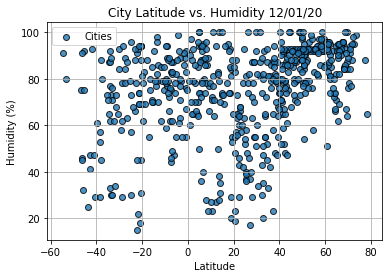

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

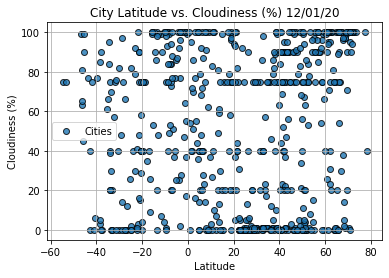

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

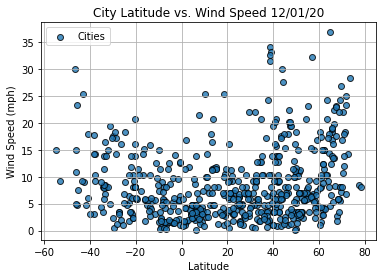

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"R value = {r_value}")

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-12-02 03:44:10,-54.80,-68.30,37.40,91,75,14.99
2,Piopio,NZ,2020-12-02 03:46:21,-38.47,175.02,73.00,53,85,3.00
3,Vaini,TO,2020-12-02 03:46:21,-21.20,-175.20,80.60,74,75,8.05
4,Bluff,NZ,2020-12-02 03:46:21,-46.60,168.33,55.17,75,99,29.97
5,Rikitea,PF,2020-12-02 03:46:21,-23.12,-134.97,75.78,66,79,5.03
...,...,...,...,...,...,...,...,...,...
558,Corrientes,AR,2020-12-02 03:47:32,-27.48,-58.83,80.01,84,0,3.06
567,Sawtell,AU,2020-12-02 03:47:33,-30.38,153.10,78.80,65,40,17.22
571,Isangel,VU,2020-12-02 03:47:33,-19.55,169.27,86.00,62,75,5.82
576,Auki,SB,2020-12-02 03:47:34,-8.77,160.70,83.84,74,84,1.74


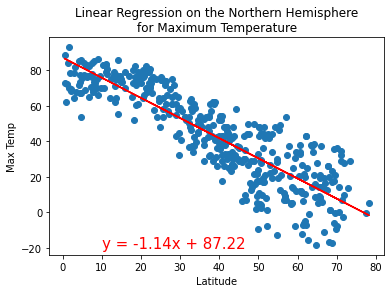

R value = -0.871389728534688


In [22]:
# Linear regression on the Northern Hemisphere vs Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',(10,-20))

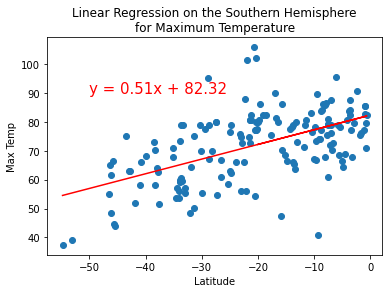

R value = 0.549096725297655


In [23]:
# Linear regression on the Southern Hemisphere vs Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',(-50,90))

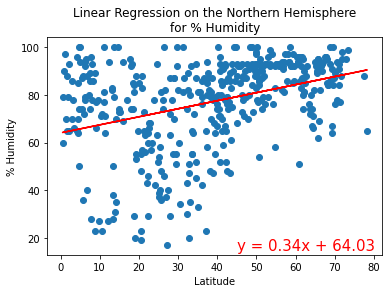

R value = 0.36270169126698143


In [24]:
# Linear regression on the Northern Hemisphere vs Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere\nfor % Humidity',
                       '% Humidity',(45,15))

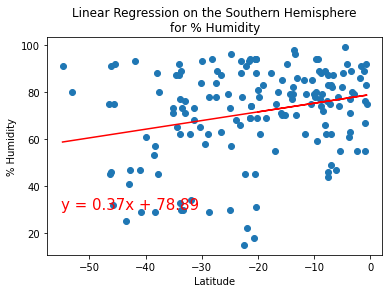

R value = 0.25697802185105184


In [25]:
# Linear regression on the Southern Hemisphere vs Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere\nfor % Humidity',
                       '% Humidity',(-55,30))

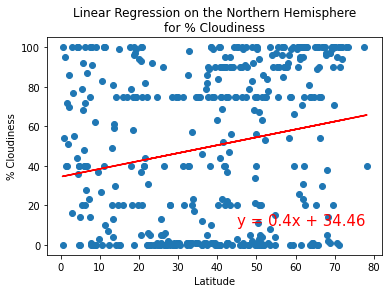

R value = 0.20208819322511906


In [26]:
# Linear regression on the Northern Hemisphere vs Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',(45,10))

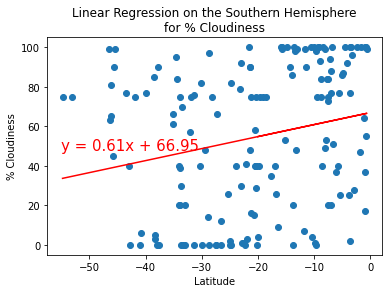

R value = 0.22432112470117613


In [27]:
# Linear regression on the Southern Hemisphere vs Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',(-55,48))

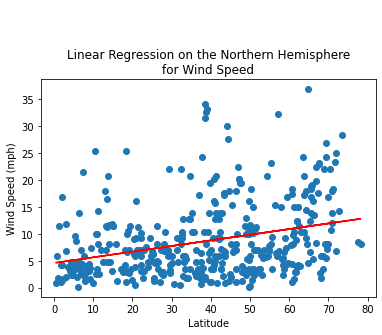

R value = 0.31082980924424297


In [28]:
# Linear regression on the Northern Hemisphere vs Wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere\nfor Wind Speed',
                       'Wind Speed (mph)',(0,50))

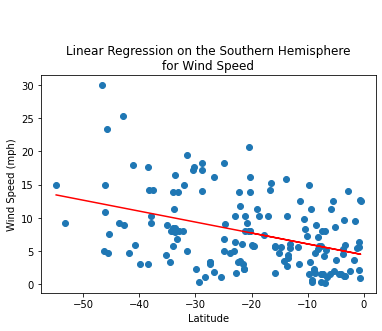

R value = -0.3981317072603338


In [29]:
# Linear regression on the Southern Hemisphere vs Wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere\nfor Wind Speed',
                       'Wind Speed (mph)',(-55,40))